In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
M=nx.read_gml("polblogs.gml", relabel=True)

In [4]:
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


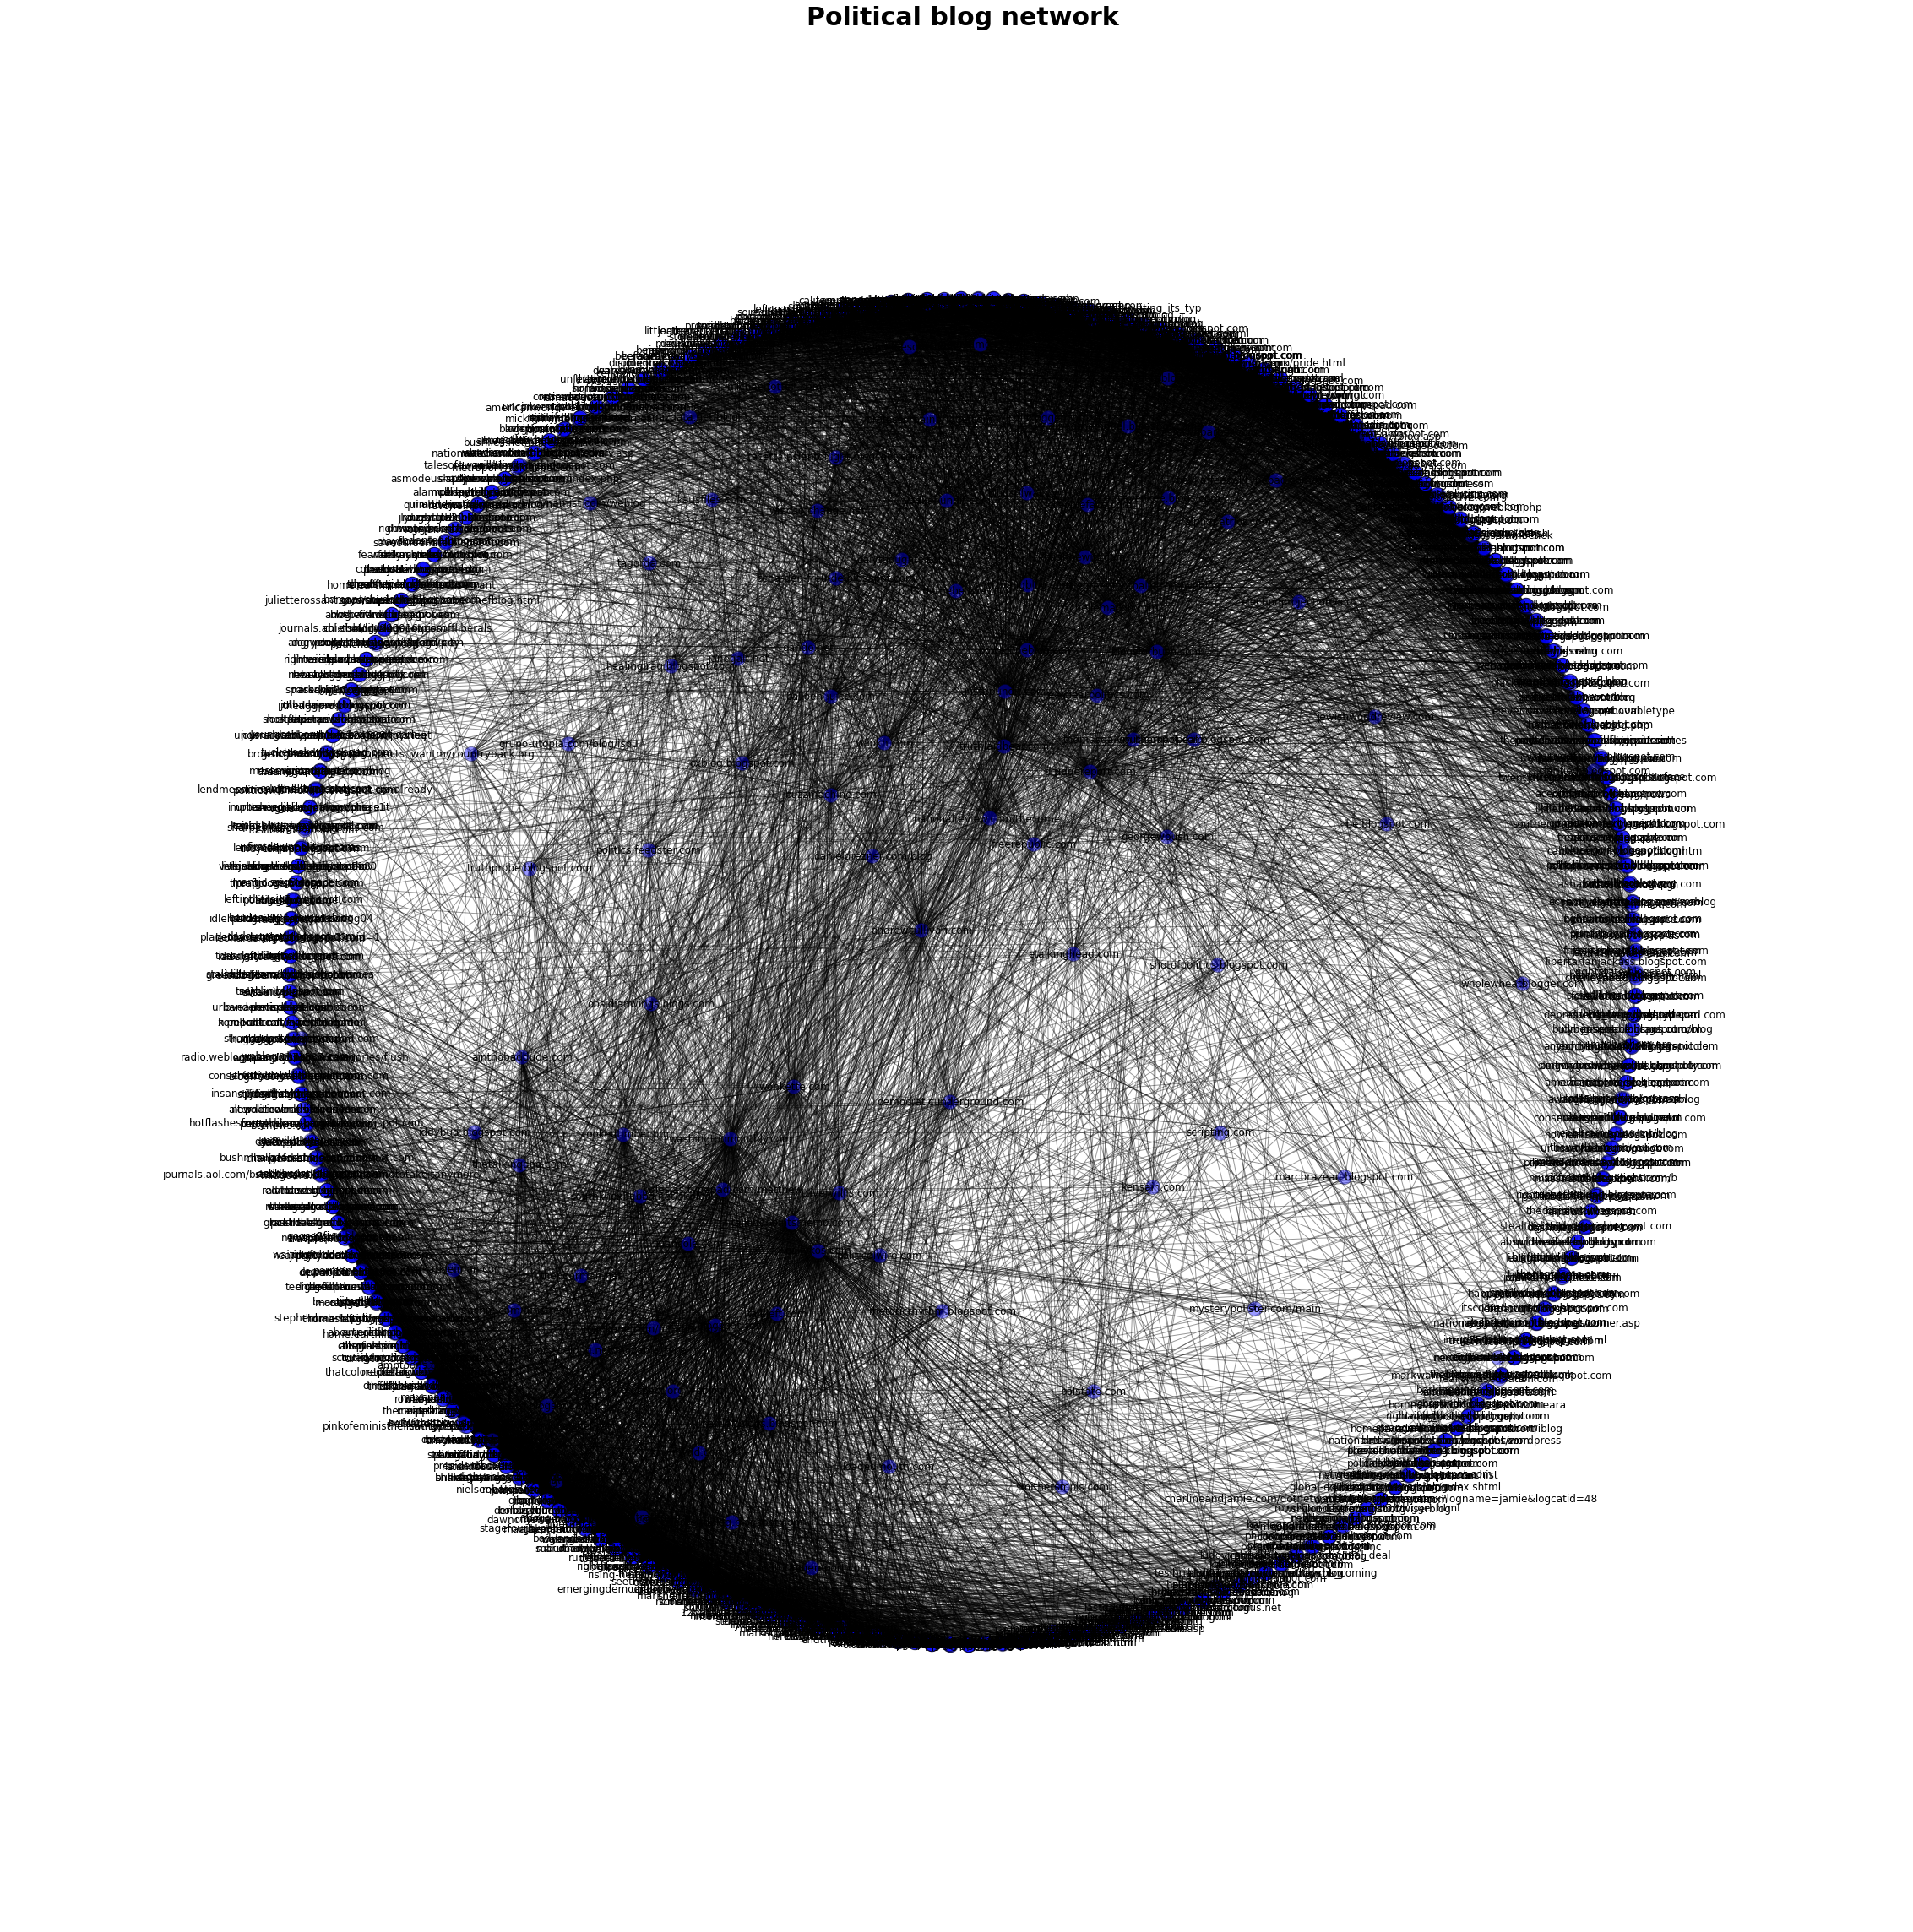

In [5]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [6]:
centrality= nx.eigenvector_centrality_numpy(G)

In [7]:
List = []
for node in centrality:
    List.append((node,centrality[node]))

In [8]:
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "The 10 most influential blogs are:"
sorted_list_desc[0:10]

The 10 most influential blogs are:


[(u'atrios.blogspot.com', 0.1946083600749798),
 (u'dailykos.com', 0.16085880865133684),
 (u'washingtonmonthly.com', 0.14572953582904322),
 (u'digbysblog.blogspot.com', 0.14165745601016702),
 (u'bodyandsoul.typepad.com', 0.1400125861502597),
 (u'liberaloasis.com', 0.13870430871243797),
 (u'tbogg.blogspot.com', 0.13695090011935754),
 (u'corrente.blogspot.com', 0.1286646708766482),
 (u'talkingpointsmemo.com', 0.12715536738447394),
 (u'dneiwert.blogspot.com', 0.1214709283007558)]

In [9]:
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "The 10 least influential blogs are:"
sorted_list_asc[0:10]

The 10 least influential blogs are:


[(u'thelonedem.com', -1.673936276017478e-18),
 (u'digital-democrat.blogspot.com', 2.0027466618050905e-18),
 (u'americanworldview.tripod.com/weltansblog', 7.4387907889797556e-09),
 (u'quimundus.modblog.com', 6.704098662920829e-08),
 (u'batr.org/commentary.html', 6.76656147185612e-07),
 (u'batr.net', 6.767361565989894e-07),
 (u'democratvoice.org', 1.040626343021359e-06),
 (u'quimundus.squarespace.com', 6.098983141250292e-06),
 (u'massachusetts-liberal.com', 9.36072506542636e-06),
 (u'thingsasitis.net', 1.1599475002592618e-05)]

In [10]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('r')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

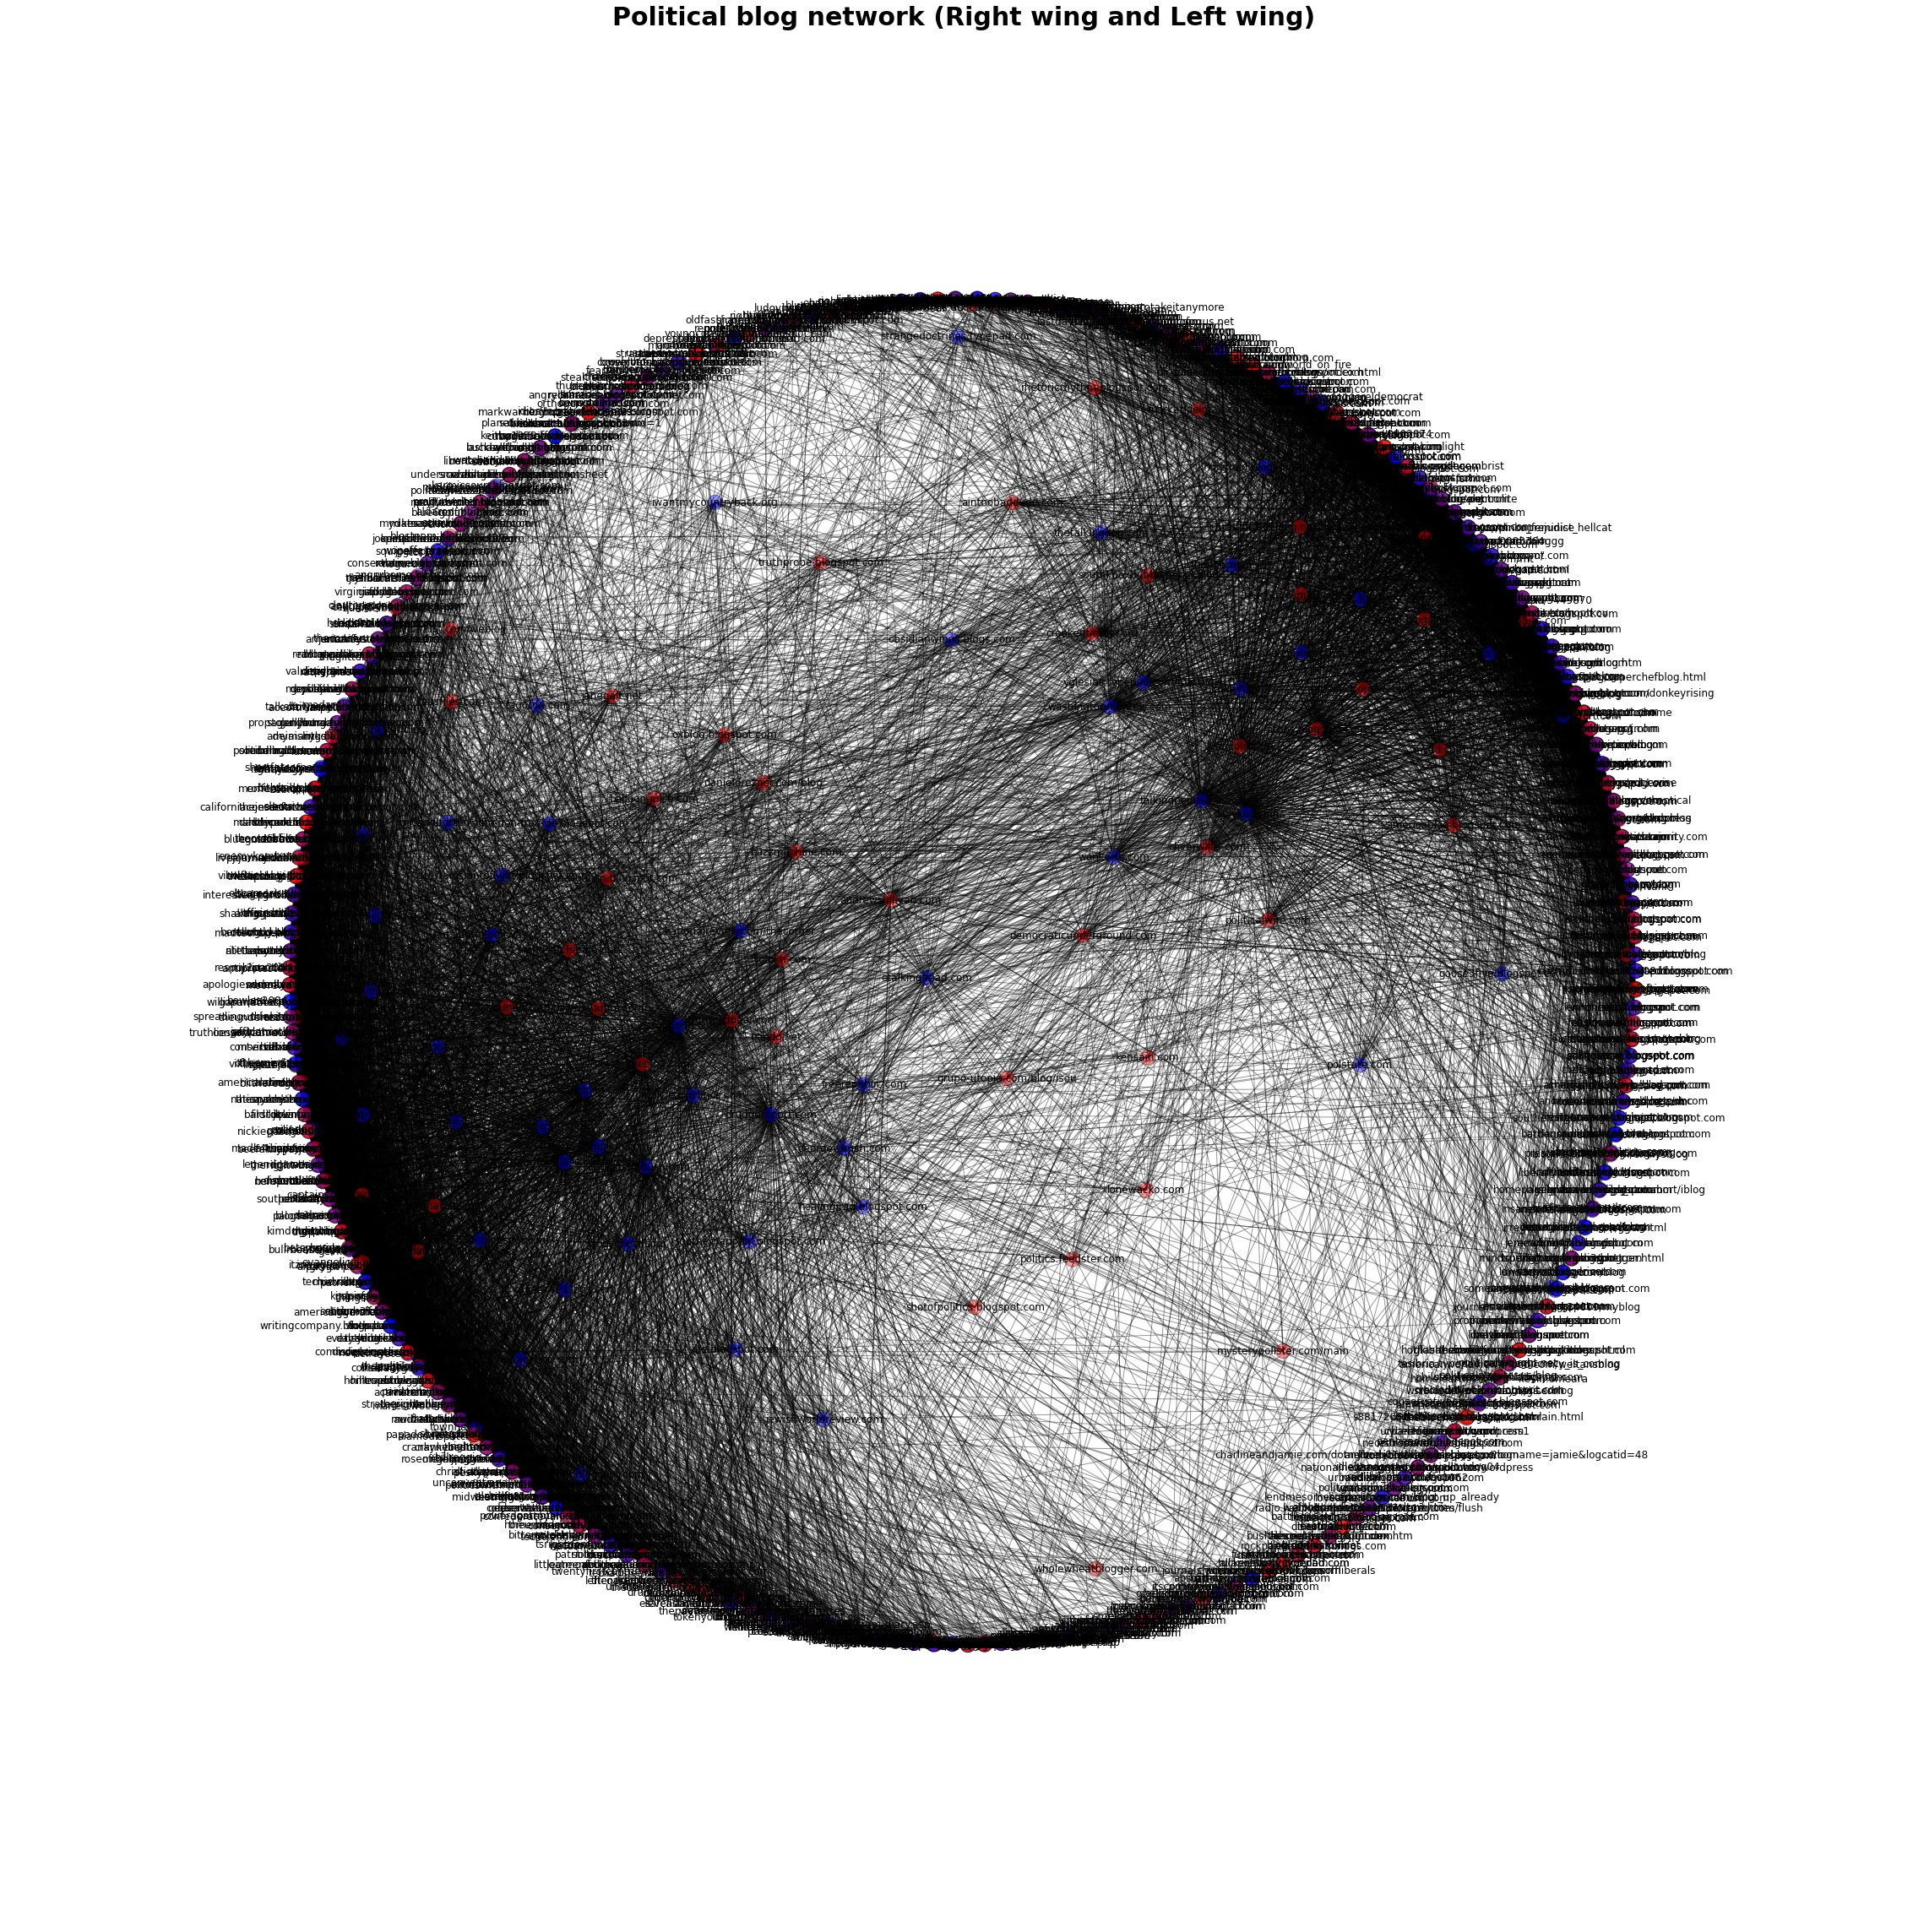

In [11]:

plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [12]:
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [13]:
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [14]:
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [15]:
def sorting(centrality):
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc


In [16]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "The 10 most influential Left wing blogs are:"
sorted_list_desc_L[0:10]

The 10 most influential Left wing blogs are:


[(u'atrios.blogspot.com', 0.21014471148743782),
 (u'dailykos.com', 0.16888749802270203),
 (u'bodyandsoul.typepad.com', 0.15620581384468232),
 (u'liberaloasis.com', 0.15586157478431165),
 (u'digbysblog.blogspot.com', 0.15491799802870007),
 (u'tbogg.blogspot.com', 0.15057628736016992),
 (u'corrente.blogspot.com', 0.14461524166958659),
 (u'washingtonmonthly.com', 0.13912545257202874),
 (u'dneiwert.blogspot.com', 0.13430191643368583),
 (u'pandagon.net', 0.13254155028960107)]

In [17]:
print "The 10 least influential Left wing blogs are:"
sorted_list_asc_L[0:10]

The 10 least influential Left wing blogs are:


[(u'lagernik.blogspot.com', -4.079347532593174e-18),
 (u'thebarrexam.blogspot.com', -3.652963912275236e-18),
 (u'praguewriter.typepad.com', -3.575363752227653e-18),
 (u'demoliberal.blogspot.com', -3.4404906654418414e-18),
 (u'smearbody.blogspot.com', -3.3922192106932225e-18),
 (u'rudyforfreeholder.org', -3.304671749738143e-18),
 (u'niagarabuzz.com', -3.27925301835515e-18),
 (u'progressiveink.com/bloggers.php', -3.208949069000174e-18),
 (u'americandreamslost.blogspot.com', -3.1616060479266576e-18),
 (u'badattitudes.com/mt', -3.1062071747403196e-18)]

In [18]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "The 10 most influential Right wing blogs are:"
sorted_list_desc_R[0:10]

The 10 most influential Right wing blogs are:


[(u'instapundit.com', 0.2113046229459694),
 (u'blogsforbush.com', 0.20259499592591637),
 (u'hughhewitt.com', 0.1681917655348155),
 (u'lashawnbarber.com', 0.1589278385493738),
 (u'michellemalkin.com', 0.14770452828583155),
 (u'wizbangblog.com', 0.14672175943553042),
 (u'powerlineblog.com', 0.14614009491871863),
 (u'vodkapundit.com', 0.13718343720517892),
 (u'littlegreenfootballs.com/weblog', 0.13699993217225223),
 (u'outsidethebeltway.com', 0.12316955954206642)]

In [19]:
print "The 10 least influential Right wing blogs are:"
sorted_list_asc_R[0:10]

The 10 least influential Right wing blogs are:


[(u'poeticvalues.blogspot.com', -3.506042314966343e-18),
 (u'batr.net', -3.477477228123464e-18),
 (u'sarebabe.blogdrive.com', -1.6592944430629364e-18),
 (u'markmeador.blogspot.com', -1.5257413539405191e-18),
 (u'blogs.blogosphere.ca/brock', -1.3190335198656073e-18),
 (u'lancehaun.com', -1.2063244671748318e-18),
 (u'poptext.blogspot.com', -1.1875469369307274e-18),
 (u'salestaxusa.com', -1.1013972575438643e-18),
 (u'campaignofone.org/blog/index.asp', -9.639240202077847e-19),
 (u'gwbblows.blogspot.com', -9.466872408236886e-19)]